In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.ensemble import RandomForestRegressor

In [21]:
train = pd.read_csv('/Users/tarun/kaggle_self/Tabular Playground Series - Jul 2021/train.csv')
test = pd.read_csv('/Users/tarun/kaggle_self/Tabular Playground Series - Jul 2021/test.csv')
sample_submission = pd.read_csv('/Users/tarun/kaggle_self/Tabular Playground Series - Jul 2021/sample_submission.csv')

In [22]:
train.head()

date_time  deg_C  relative_humidity  absolute_humidity  sensor_1  \
0  2010-03-10 18:00:00   13.1               46.0             0.7578    1387.2   
1  2010-03-10 19:00:00   13.2               45.3             0.7255    1279.1   
2  2010-03-10 20:00:00   12.6               56.2             0.7502    1331.9   
3  2010-03-10 21:00:00   11.0               62.4             0.7867    1321.0   
4  2010-03-10 22:00:00   11.9               59.0             0.7888    1272.0   

   sensor_2  sensor_3  sensor_4  sensor_5  target_carbon_monoxide  \
0    1087.8    1056.0    1742.8    1293.4                     2.5   
1     888.2    1197.5    1449.9    1010.9                     2.1   
2     929.6    1060.2    1586.1    1117.0                     2.2   
3     929.0    1102.9    1536.5    1263.2                     2.2   
4     852.7    1180.9    1415.5    1132.2                     1.5   

   target_benzene  target_nitrogen_oxides  
0            12.0                   167.7  
1             9.9                    98.9  
2             9.2                   127.1  
3             9.7                   177.2  
4             6.4                   121.8

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7111 entries, 0 to 7110
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date_time               7111 non-null   object 
 1   deg_C                   7111 non-null   float64
 2   relative_humidity       7111 non-null   float64
 3   absolute_humidity       7111 non-null   float64
 4   sensor_1                7111 non-null   float64
 5   sensor_2                7111 non-null   float64
 6   sensor_3                7111 non-null   float64
 7   sensor_4                7111 non-null   float64
 8   sensor_5                7111 non-null   float64
 9   target_carbon_monoxide  7111 non-null   float64
 10  target_benzene          7111 non-null   float64
 11  target_nitrogen_oxides  7111 non-null   float64
dtypes: float64(11), object(1)
memory usage: 666.8+ KB


In [24]:
train.describe()

deg_C  relative_humidity  absolute_humidity     sensor_1  \
count  7111.000000        7111.000000        7111.000000  7111.000000   
mean     20.878034          47.561004           1.110309  1091.572100   
std       7.937917          17.398731           0.398950   218.537554   
min       1.300000           8.900000           0.198800   620.300000   
25%      14.900000          33.700000           0.855900   930.250000   
50%      20.700000          47.300000           1.083500  1060.500000   
75%      25.800000          60.800000           1.404150  1215.800000   
max      46.100000          90.800000           2.231000  2088.300000   

          sensor_2     sensor_3     sensor_4     sensor_5  \
count  7111.000000  7111.000000  7111.000000  7111.000000   
mean    938.064970   883.903305  1513.238349   998.335565   
std     281.978988   310.456355   350.180310   381.537695   
min     364.000000   310.600000   552.900000   242.700000   
25%     734.900000   681.050000  1320.350000   722.850000   
50%     914.200000   827.800000  1513.100000   928.700000   
75%    1124.100000  1008.850000  1720.400000  1224.700000   
max    2302.600000  2567.400000  2913.800000  2594.600000   

       target_carbon_monoxide  target_benzene  target_nitrogen_oxides  
count             7111.000000     7111.000000             7111.000000  
mean                 2.086219       10.237083              204.066784  
std                  1.447109        7.694426              193.927723  
min                  0.100000        0.100000                1.900000  
25%                  1.000000        4.500000               76.450000  
50%                  1.700000        8.500000              141.000000  
75%                  2.800000       14.200000              260.000000  
max                 12.500000       63.700000             1472.300000

In [25]:
carbon_monoxide = train['target_carbon_monoxide']
benzene = train['target_benzene']
nitrogen_oxides = train['target_nitrogen_oxides']

In [26]:
import plotly.express as px
fig = px.scatter(train, color="target_carbon_monoxide", x="absolute_humidity", y = 'target_carbon_monoxide',
                 hover_data=['target_carbon_monoxide'],width=900, height=600)
fig.show()
fig1 = px.scatter(train, color="target_benzene", x="absolute_humidity", y = 'target_benzene',
                 hover_data=['target_benzene'],width=900, height=600)
fig1.show()
fig2 = px.scatter(train, color="target_nitrogen_oxides", x="absolute_humidity", y = 'target_nitrogen_oxides',
                 hover_data=['target_nitrogen_oxides'],width=900, height=600)
fig2.show()

In [27]:
targets = train[['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides']].copy()

In [28]:
fig3 = px.scatter_matrix(train,
    dimensions=["sensor_1", "sensor_2", "sensor_3", "sensor_4", "sensor_5"],
    color="target_carbon_monoxide")
fig3.show()

In [29]:
fig4 = px.scatter_matrix(train,
    dimensions=["sensor_1", "sensor_2", "sensor_3", "sensor_4", "sensor_5"],
    color="target_benzene")
fig4.show()

In [30]:
fig5 = px.scatter_matrix(train,
    dimensions=["sensor_1", "sensor_2", "sensor_3", "sensor_4", "sensor_5"],
    color="target_nitrogen_oxides")
fig5.show()

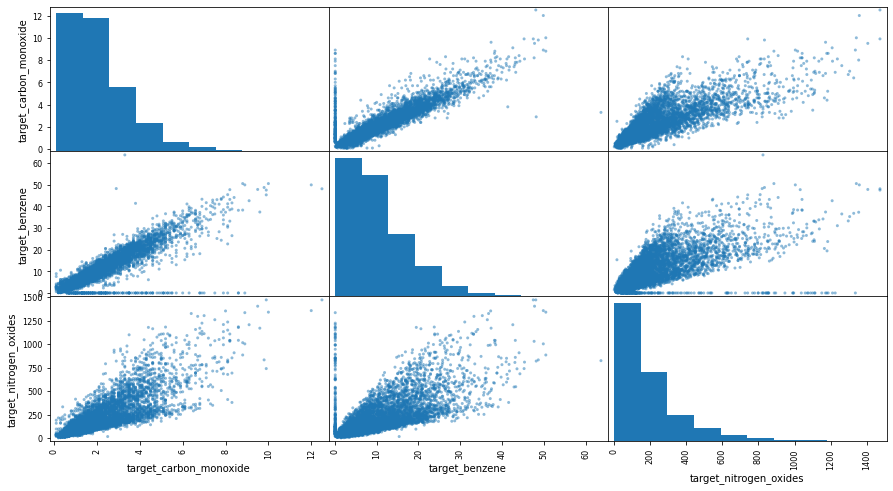

In [31]:
pd.plotting.scatter_matrix(targets, alpha=0.5,figsize=(15, 8))
plt.show()

In [32]:
train['date_time'] = train['date_time'].astype('datetime64[ns]').astype(np.int64)/10**9
test['date_time'] = test['date_time'].astype('datetime64[ns]').astype(np.int64)/10**9

In [33]:
train.head()

date_time  deg_C  relative_humidity  absolute_humidity  sensor_1  \
0  1.268244e+09   13.1               46.0             0.7578    1387.2   
1  1.268248e+09   13.2               45.3             0.7255    1279.1   
2  1.268251e+09   12.6               56.2             0.7502    1331.9   
3  1.268255e+09   11.0               62.4             0.7867    1321.0   
4  1.268258e+09   11.9               59.0             0.7888    1272.0   

   sensor_2  sensor_3  sensor_4  sensor_5  target_carbon_monoxide  \
0    1087.8    1056.0    1742.8    1293.4                     2.5   
1     888.2    1197.5    1449.9    1010.9                     2.1   
2     929.6    1060.2    1586.1    1117.0                     2.2   
3     929.0    1102.9    1536.5    1263.2                     2.2   
4     852.7    1180.9    1415.5    1132.2                     1.5   

   target_benzene  target_nitrogen_oxides  
0            12.0                   167.7  
1             9.9                    98.9  
2             9.2                   127.1  
3             9.7                   177.2  
4             6.4                   121.8

In [34]:
carbon_monoxide = carbon_monoxide.values.reshape(-1, 1)
benzene = benzene.values.reshape(-1,1)
nitrogen_oxides = nitrogen_oxides.values.reshape(-1,1)

In [35]:
X_train = train.drop(['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'], axis=1).copy()

In [36]:
rf_model = RandomForestRegressor(random_state=6)
rf_model.fit(X_train, carbon_monoxide)
sample_submission['target_carbon_monoxide'] = rf_model.predict(test)

rf_model = RandomForestRegressor(random_state=6)
rf_model.fit(X_train, benzene)
sample_submission['target_benzene'] = rf_model.predict(test)

rf_model = RandomForestRegressor(random_state=6)
rf_model.fit(X_train, nitrogen_oxides)
sample_submission['target_nitrogen_oxides'] = rf_model.predict(test)

<ipython-input-36-2eed0da38151>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

<ipython-input-36-2eed0da38151>:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

<ipython-input-36-2eed0da38151>:10: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [37]:
sample_submission.to_csv('submission.csv', index=False)